# One Class SVM 

* [Introduction](#introduction)
* [Experiments with simulated data](#simulated)
* [Experiments a real dataset](#real)
    * [Data description](#descrioprion)
    * [Data preparation](#preparation)
    * [OC-SVM](#ocsvm)

<a id="introduction"></a><br>

## Introduction

In one class learning problems we have data training only for the positive class and the aim is to detect outliers. One-Class SVM (OC-SVM) do it by findin the minimal hyperbal containing the positive examples.

<img src="img/figure1.png" width="400">

So, the optimization problem is the following 

$$
\min_{R,b,\xi} R^2 + \frac{1}{\nu n} \sum_{i=1}^n \xi_i \quad \text{s.t.} \quad \| \phi(x_i) - b \|^2 \leq R^2 + \xi_i,\,\, \xi_i\geq 0
$$

where $R$ is the radius of the ball, $\xi_i$ the Slack variable of $i$-th point and in the constraint we are requiring all the point to be inside the ball (In the feature space, $\phi(\cdot)$ is the map). Instead of using $C$ as weight of the slack variables we can put $1/\nu n$ where $n$ is the number of examples and $\nu$ a parameter that allows to trade off how many slack we want to admit.

We can write the lagrangian with respect to the primal variables $R, b, \xi$ and the dual variables $\alpha, \mu$

$$
L(R, b, \xi, \alpha, \mu) = R^2 + \frac{1}{\nu n} \sum_{i=1}^n \xi_i + \sum_{i=1}^n \alpha_i ( \|\phi(x_i)-b\|^2-R^2-\xi_i) -\sum_{i=1}^n\mu_i \xi_i
$$

and by differentiating with respect to the primal variable we can rewrite the lagrangian in terms of the dual variables (and introducing  a kernel function  $K(x_i, x_j)$)

$$
L(\alpha, \mu) = \sum_{i} \alpha_i K(x_i, x_i) - \sum_{i}\sum_{j} \alpha_i \alpha_j K(x_i,x_j) \quad \text{where}\,\, 0\leq \alpha_i \leq \frac{1}{\nu n}, \,\, \sum_{i}\alpha_i = 1
$$

To minimize the primal problem we can now maximize the dual one. <br>
For translation invariance kernel $k(x,x)$ is constant over $x$ hence we can simplify the problem and make it very similar to the optimization problem of SVM for classification 

$$
\text{arg} \min_{\alpha} \sum_{i}\sum_{j} \alpha_i \alpha_j K(x_i,x_j) \quad{s.t.} \,\, 0\leq \alpha_i \leq \frac{1}{\nu n}, \,\, \sum_{i}\alpha_i = 1
$$

The difference is that there aren't the labels $y_i$ because now we have only one class and term $\sum_i \alpha_i$ it is not present because now it is constrained to $1$.


<br>
<br>
*Translation invariant kernel*: $K(x,x) = \phi^T(x)\phi(x) = const$, that means that all observations lies on a sphere (in the feature space)

<img src="img/figure2.png" width="400">

In one class SVM we are separating points from the origin, which represents the outliers. The slack variables are now the distance from the optimal hyperplane.


<a id="simulated"></a><br>


## Experiments with simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
def plot_decision_function(model, ax, sv=True):
    ## Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(-4, 4, 100),
                         np.linspace(-4, 4, 100))
    ## Evaluate the model
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ## Plot the margin
    ax = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax = plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    
    ax = plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 6), cmap=plt.cm.PuBu)
    
    if sv:
        ax = plt.scatter(model.support_vectors_[:, 0],
                       model.support_vectors_[:, 1],
                       s=300, linewidth=1, facecolors='none', edgecolors='black')

def plot_new_observations(X_train, X_new, anomaly, ax):
    _ = plt.scatter(X_train[:,0], X_train[:,1],
                    axes=ax, color='w', s=40, edgecolors='k',
                    label='Training data')

    _ = plt.scatter(X_new[:,0], X_new[:,1], axes=ax,
                    color='violet', s=40, edgecolors='k',
                    label='New regular observations')

    _ = plt.scatter(anomaly[:,0], anomaly[:,1], axes=ax,
                    color='gold', s=40, edgecolors='k',
                    label='New abnormal observations')

    _ = ax.legend()
    _ = ax.set_xlim([-4, 4])
    _ = ax.set_ylim([-4, 4])
            

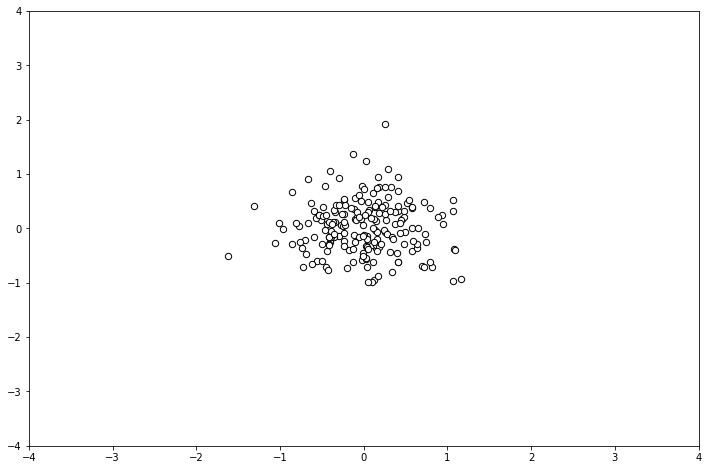

In [3]:
n_points = 200

## generate a cluster of points for the training 
np.random.seed(42)
X_train = 0.5 * np.random.randn(n_points, 2)

## Plot
fig, ax = plt.subplots(figsize=(12,8))
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax, color='w', s=40, edgecolors='k')
_ = ax.set_xlim([-4, 4])
_ = ax.set_ylim([-4, 4])

Training error = 8/200


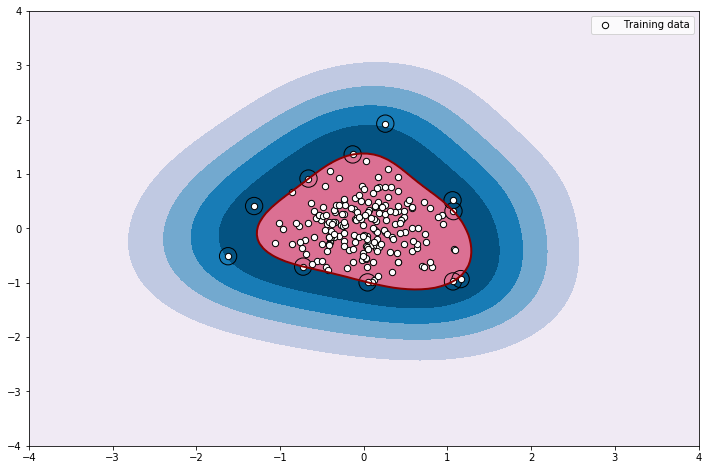

In [4]:
model = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.7)
model.fit(X_train)

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=True)
## Add the training points
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax,
                color='w', s=40, edgecolors='k',label='Training data')
_ = ax.legend()

## Compute the empirical error 
y_train = model.predict(X_train)
err_emp_1 = y_train[y_train == -1].size
print("Training error = {}/{}".format(err_emp_1, n_points))

Training error = 5/200


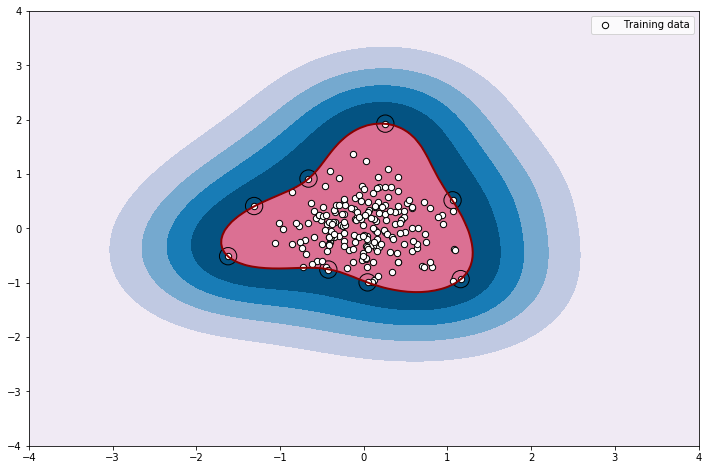

In [5]:
## Reduce nu, i.e. weight more the slack variables
model = svm.OneClassSVM(nu=0.005, kernel="rbf", gamma=0.7)
model.fit(X_train)

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=True)
## Add the training points
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax,
                color='w', s=40, edgecolors='k',label='Training data')
_ = ax.legend()

## Compute the empirical error 
y_train = model.predict(X_train)
err_emp_2 = y_train[y_train == -1].size
print("Training error = {}/{}".format(err_emp_2, n_points))

As we can see from the picture above, by reducing $\nu$ we are increasing the weight of the slack variables (because $C \sim 1/\nu$). This leads to a reduction of the error but increase the risk of overfitting.

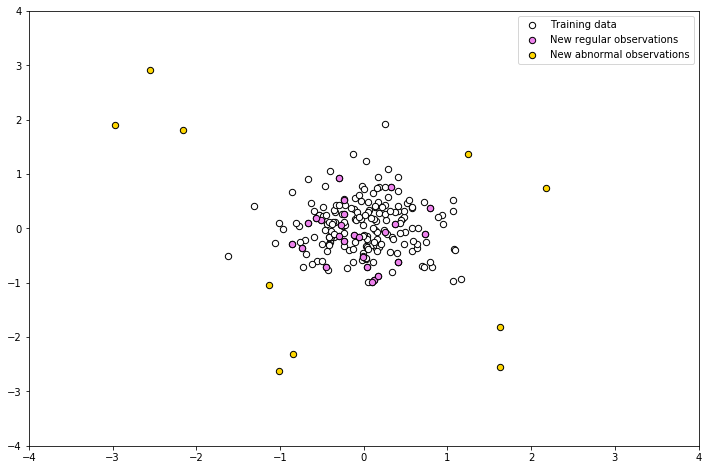

In [6]:
new_observation = 25
new_anomaly = 10
## Generate new observation from the same distribution
np.random.seed(42)
X_new = 0.5 * np.random.randn(new_observation, 2)
## Generate outliers
anomaly = np.random.uniform(low=-3, high=3, size=(new_anomaly, 2))

## Plot
fig, ax = plt.subplots(figsize=(12,8))
plot_new_observations(X_train, X_new, anomaly, ax)

Fraction of new regular observations misclassified = 0/25
Fraction of new abnormal observations correctly classified = 10/10


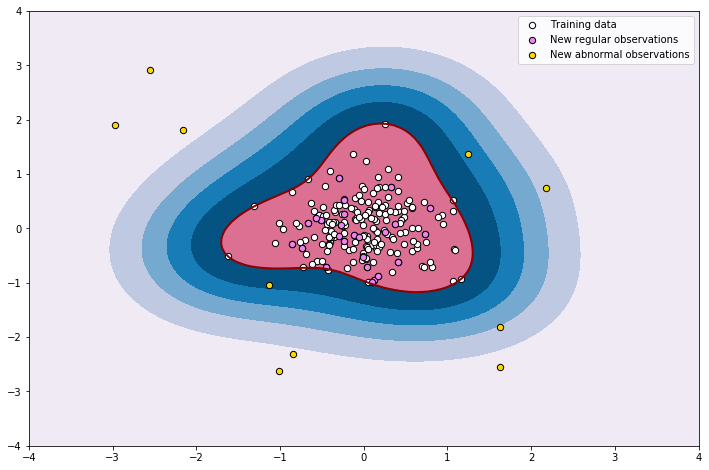

In [7]:
y_new = model.predict(X_new)
y_anomaly = model.predict(anomaly)

err_new = y_new[y_new == -1].size
err_anomaly = y_anomaly[y_anomaly == -1].size

print("Fraction of new regular observations misclassified = {}/{}".format(err_new, new_observation))
print("Fraction of new abnormal observations correctly classified = {}/{}".format(err_anomaly, new_anomaly))

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=False)
plot_new_observations(X_train, X_new, anomaly, ax)

Let's try to make the problem a little bit more complex, i.e. use two clusters as positive examples 

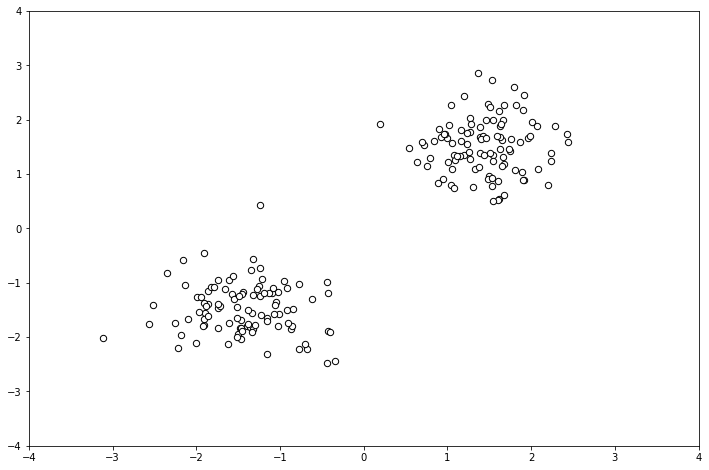

In [8]:
## generate two cluster for the training 
np.random.seed(42)
X_train1 = 0.5 * np.random.randn(n_points//2, 2)+1.5
X_train2 = 0.5 * np.random.randn(n_points//2, 2)-1.5

X_train = np.r_[X_train1, X_train2]

## Plot
fig, ax = plt.subplots(figsize=(12,8))
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax, color='w', s=40, edgecolors='k')
_ = ax.set_xlim([-4, 4])
_ = ax.set_ylim([-4, 4])

Training error = 13/200


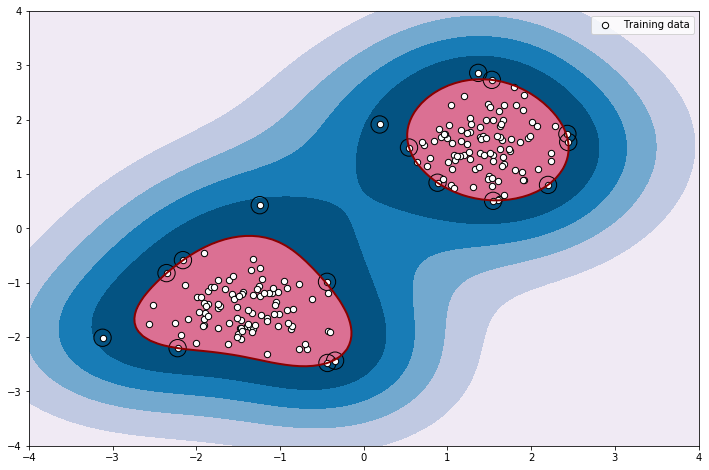

In [9]:
model = svm.OneClassSVM(nu=0.06, kernel="rbf", gamma=0.5)
model.fit(X_train)

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=True)
## Add the training points
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax,
                color='w', s=40, edgecolors='k',label='Training data')
_ = ax.legend()

## Compute the empirical error 
y_train = model.predict(X_train)
err_emp_1 = y_train[y_train == -1].size
print("Training error = {}/{}".format(err_emp_1, n_points))

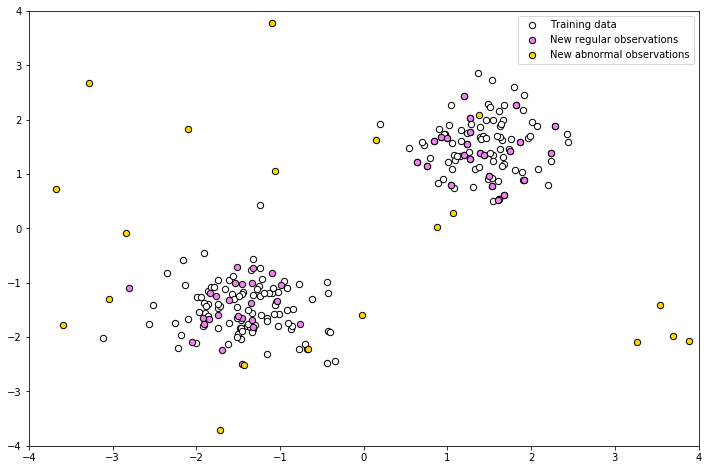

In [10]:
new_observation = 50
new_anomaly = 20
## Generate new observation from the same distribution
np.random.seed(42)
X_new_1 = 0.5 * np.random.randn(new_observation//2, 2)+1.5
X_new_2 = 0.5 * np.random.randn(new_observation//2, 2)-1.5
X_new = np.r_[X_new_1, X_new_2]
## Generate outliers
anomaly = np.random.uniform(low=-4, high=4, size=(new_anomaly, 2))

## Plot
fig, ax = plt.subplots(figsize=(12,8))
plot_new_observations(X_train, X_new, anomaly, ax)

Fraction of new regular observations misclassified = 2/50
Fraction of new abnormal observations correctly classified = 18/20


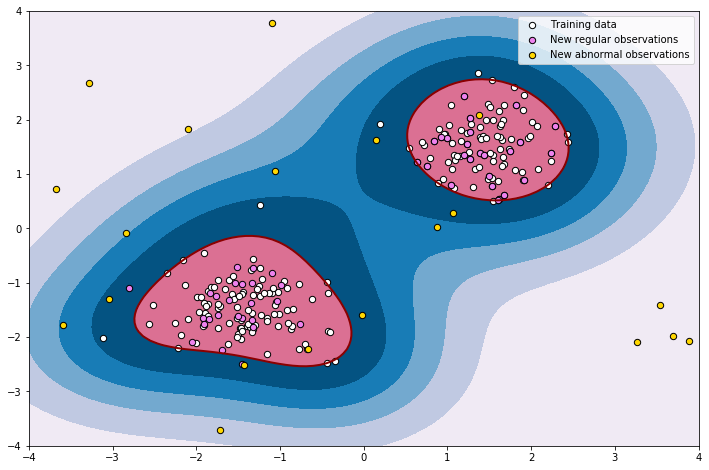

In [11]:
y_new = model.predict(X_new)
y_anomaly = model.predict(anomaly)

err_new = y_new[y_new == -1].size
err_anomaly = y_anomaly[y_anomaly == -1].size

print("Fraction of new regular observations misclassified = {}/{}".format(err_new, new_observation))
print("Fraction of new abnormal observations correctly classified = {}/{}".format(err_anomaly, new_anomaly))

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=False)
plot_new_observations(X_train, X_new, anomaly, ax)

We can try to move the cluster closer

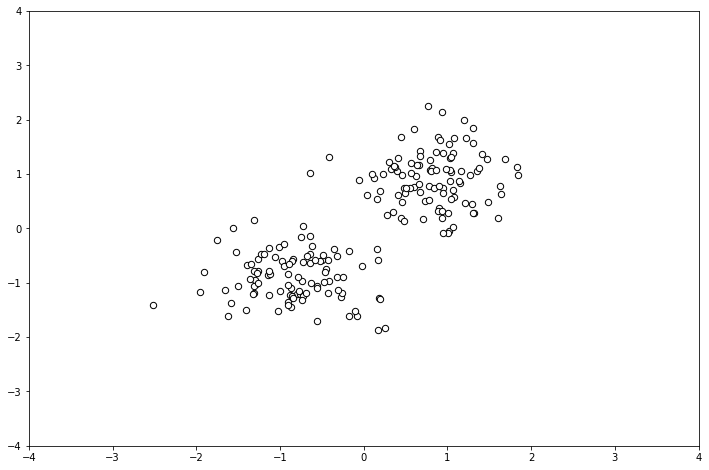

In [12]:
np.random.seed(42)
X_train1 = 0.5 * np.random.randn(n_points//2, 2)+0.9
X_train2 = 0.5 * np.random.randn(n_points//2, 2)-0.9

X_train = np.r_[X_train1, X_train2]

## Plot
fig, ax = plt.subplots(figsize=(12,8))
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax, color='w', s=40, edgecolors='k')
_ = ax.set_xlim([-4, 4])
_ = ax.set_ylim([-4, 4])

Training error = 9/200


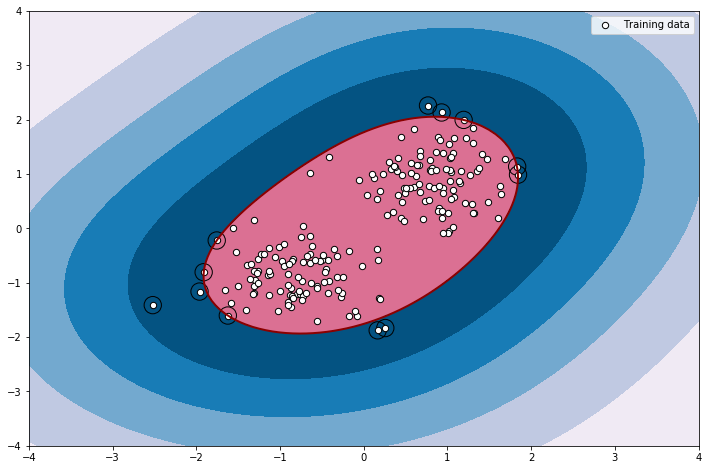

In [13]:
model = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
model.fit(X_train)

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=True)
## Add the training points
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax,
                color='w', s=40, edgecolors='k',label='Training data')
_ = ax.legend()

## Compute the empirical error 
y_train = model.predict(X_train)
err_emp_1 = y_train[y_train == -1].size
print("Training error = {}/{}".format(err_emp_1, n_points))

If we want to try to separate the two cluster we need to increase the value of gamma and $\nu$ but this increase the errors a lot.

Training error = 60/200


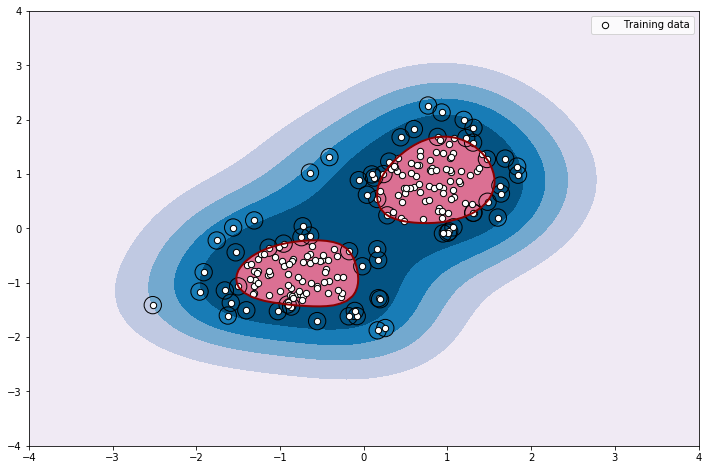

In [14]:
model = svm.OneClassSVM(nu=0.3, kernel="rbf", gamma=1)
model.fit(X_train)

fig, ax = plt.subplots(figsize=(12,8))
## Plot the decision function
plot_decision_function(model, ax, sv=True)
## Add the training points
_ = plt.scatter(X_train[:,0], X_train[:,1], axes=ax,
                color='w', s=40, edgecolors='k',label='Training data')
_ = ax.legend()

## Compute the empirical error 
y_train = model.predict(X_train)
err_emp_1 = y_train[y_train == -1].size
print("Training error = {}/{}".format(err_emp_1, n_points))

<a id="real"></a><br>

# Experiment with a real dataset

In [15]:
import pandas as pd 
import seaborn as sns

sns.set(style="darkgrid")

<a id="description"></a><br>

### Description

This dataset contains transactions made by credit cards in September 2013 by european cardholders. It rapresents transactions that occurred in two days, and there are 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features $V1, V2, \dots ,V28$ are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction Amount. Feature `Class` is the response variable and it takes value $1$ in case of fraud and $0$ otherwise.

It is possible to download this dataset [here](https://www.openml.org/d/1597).

In [16]:
## Load the data into a pandas dataframe 
df = pd.read_csv("data/creditCard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [17]:
## Rename the transaction class with 'Normal' and 'Fraud'
df['Class'] = df['Class'].map(lambda x: -1 if x=="'1'" else 1)

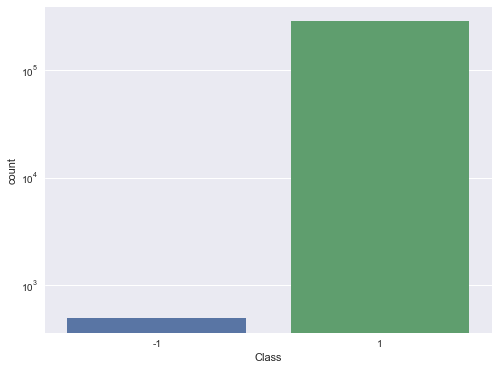

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.countplot(x='Class', data=df, ax=ax)
_ = plt.yscale('log') 

<a id='preparation'></a><br>

## Data preparation

Here we will prepare our data: we need to split the dataset in `Training` and `Test` (Respectively of size $80\%$ and $20\%$) of the original dataset and after that we will also standardize the data in order to speed up the learnign. 

We can also drop the column `Time` which is not usefull.

In [19]:
df = df.drop(['Time'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

## Split the dataset into training an test (80%/20%)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

## X,y train
y_train = X_train['Class']
## Train using the normal transactions
X_train = X_train[X_train.Class == 1].drop(['Class'], axis=1)

## X,y test
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1).values

print("Train dataset: \n{}".format(pd.value_counts(y_train)))
print("Test dataset: \n{}".format(pd.value_counts(y_test)))

Train dataset: 
 1    227451
-1       394
Name: Class, dtype: int64
Test dataset: 
 1    56864
-1       98
Name: Class, dtype: int64


In the test dataset there are $98$ fraudolent transaction. These are the outliers that we want to detect.

<a id='oc-svm'></a><br>

## OC-SVM

*note*: The main problem I found here is to tune the hyperparameter $\gamma$ and $\nu$ because of the time required for the training

In [21]:
oc_svm = svm.OneClassSVM(nu=0.0007, kernel="rbf", gamma=0.04)

In [22]:
%%time
oc_svm.fit(X_train)

CPU times: user 10min 52s, sys: 3.74 s, total: 10min 56s
Wall time: 11min


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.04, kernel='rbf',
      max_iter=-1, nu=0.0007, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [23]:
%%time
y_pred = oc_svm.predict(X_test)

CPU times: user 29 s, sys: 68.2 ms, total: 29 s
Wall time: 29.1 s


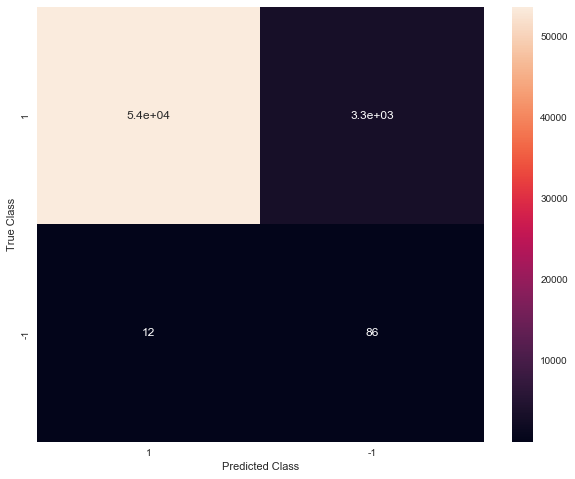

In [24]:
from sklearn.metrics import confusion_matrix

LABELS = [1, -1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=LABELS)

fig, ax = plt.subplots(figsize=(10,8))
_ = sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, 
               annot=True, ax=ax)
_ = ax.set_xlabel('Predicted Class')
_ = ax.set_ylabel('True Class')

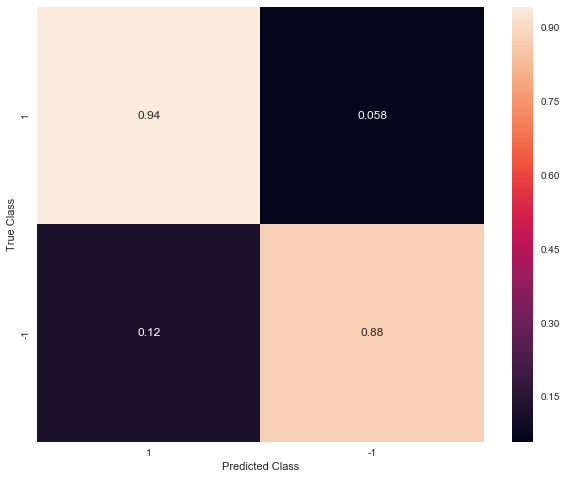

In [27]:
## Normalizer confuzion matrix

cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, 
               annot=True, ax=ax)
_ = ax.set_xlabel('Predicted Class')
_ = ax.set_ylabel('True Class')

As measure of the error we can use **Precision** and **Recall**. Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. They are defined as following 

$$
P = \frac{T_p}{T_p + F_p} \qquad \qquad R = \frac{T_p}{T_p+F_n}
$$

where $T_p$ is the number of true positive, $F_p$ the number of false positive and $F_n$ the number of false negative.
High recall but low precision means many results, most of which has low or no relevancy. When precision is high but recall is low we have the opposite - few returned results with very high relevancy. Ideally, we want high precision and high recall - many results with that are highly relevant.

In [28]:
from sklearn.metrics import recall_score, precision_score

print("Precision = {}".format(precision_score(y_test, y_pred, pos_label=-1)))
print("Recall = {}".format(recall_score(y_test, y_pred, pos_label=-1)))

Precision = 0.02531645569620253
Recall = 0.8775510204081632


Hence, we are able to identify correctly $86$ of the $98$ fraud (In fact we have a good recall). The problem is that there are a lot of false positive, i.e. normal transaction predicted as fraud ($\sim3300$) and this leads to a low precision.